In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT

Welcome to JupyROOT 6.10/08


In [2]:
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/ext/'

# MC only, ana file

In [3]:
#file = uproot.open( inputdir + 'NeutSlices_QP_allExt_withVertex.root_ana.root')
#file.keys("a") 

In [4]:
#slices = file['t_slice']
#print 'Number of entries: ', slices.numentries
#slices.keys()

In [5]:
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/BNB_V09/'
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/ext/'
inputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/'
outputdir = inputdir +'bla/'
try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)
#filename = 'NeutSlices_QP_allExt_withVertex.root_ana.root'
filename = 'NeutSlices_QP.root'

In [9]:
#test = ROOT.TChain("t_slice","t_slice")
test = ROOT.TChain("peb/my_event","my_event")
test.Add( inputdir + filename)

# uncomment one of them
cut = 'track_length>50'

tracklength = ' && ' + cut
#tracklength = ''

title_cut = ''
if(tracklength!=''):
    title_cut = ' with '+ cut


In [10]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("","",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_x3 (Potential memory leak).
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x,crtts0==0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/vertex_x.png has been created


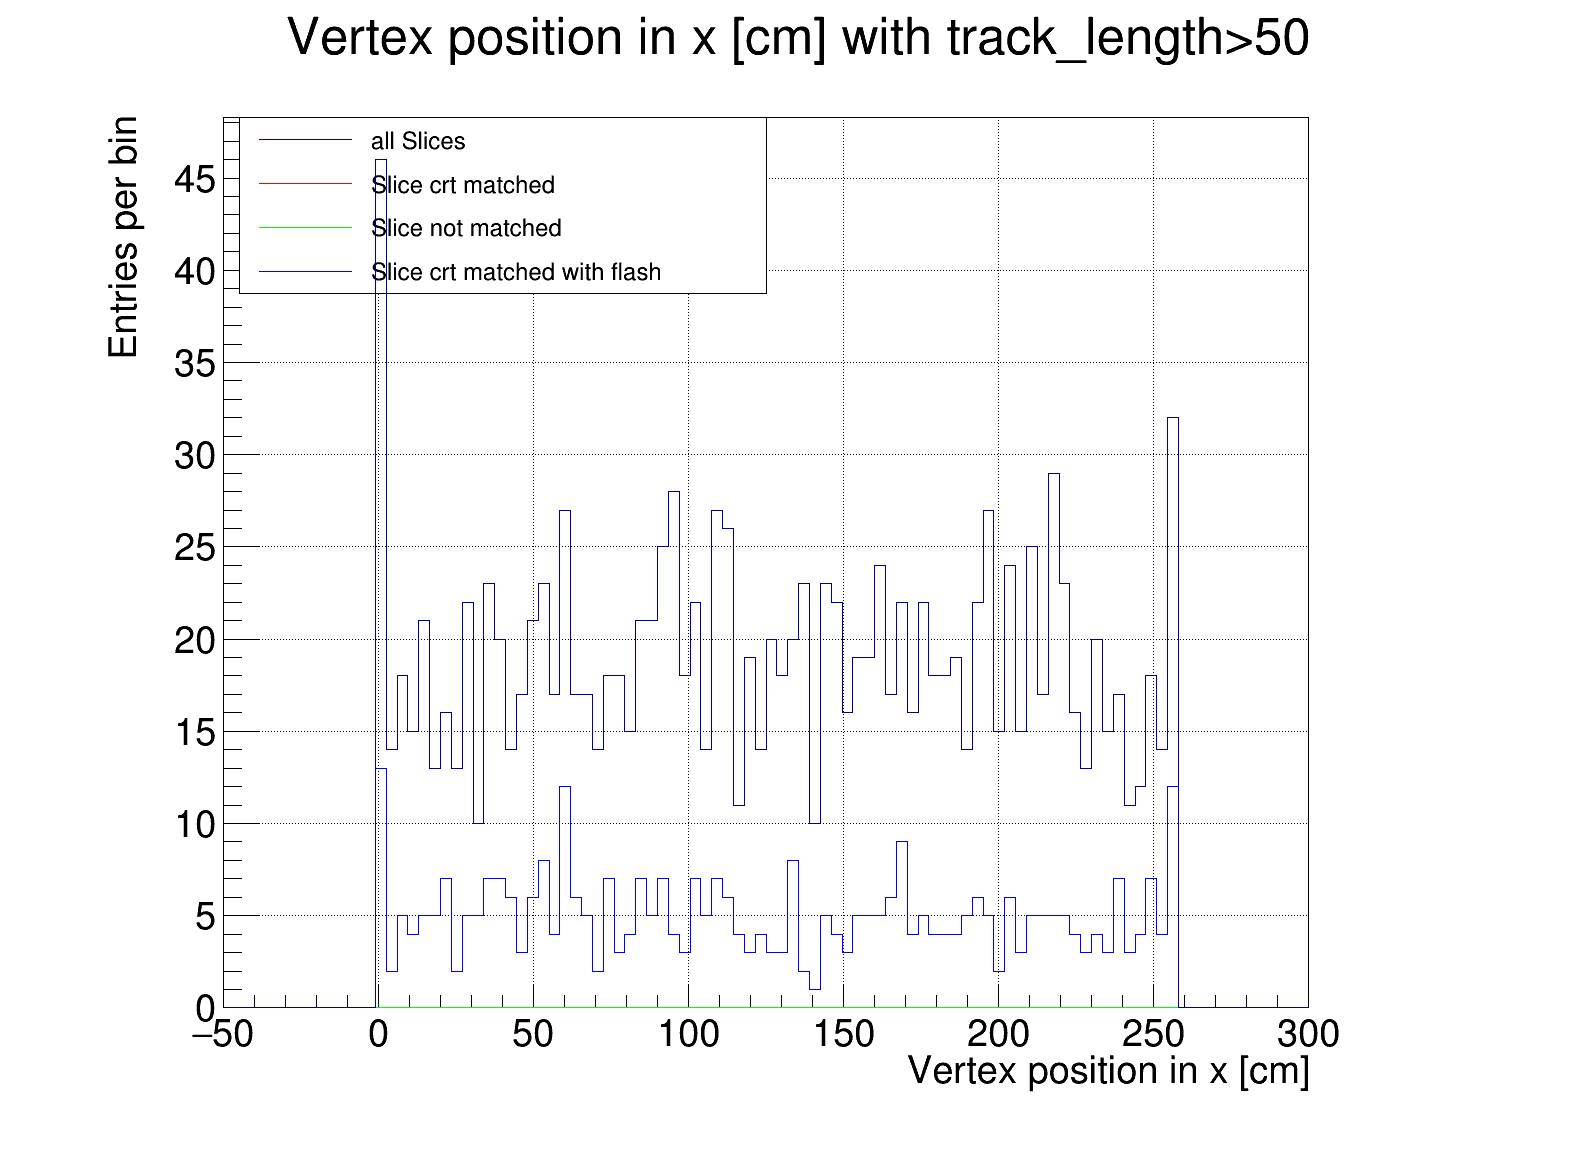

In [11]:
# generate Vertex x position plot
h_x = ROOT.TH1F("h_x","Vertex position in x [cm]" + title_cut,100,-50,300)
h_x1 = ROOT.TH1F("h_x1","CRT ts0",100,-50,300)
h_x2 = ROOT.TH1F("h_x2","CRT ts0",100,-50,300)
h_x3 = ROOT.TH1F("h_x3","CRT ts0",100,-50,300)

test.Draw('vertex_x>>h_x','1' + tracklength)
test.Draw('vertex_x>>h_x1','crtts0!=0' + tracklength)
test.Draw('vertex_x>>h_x2','crtts0==0' + tracklength)
test.Draw('vertex_x>>h_x3','flash_PE!=0' + tracklength)
h_x1.SetLineColorAlpha(2, 1);
h_x2.SetLineColorAlpha(3, 1);
h_x3.SetLineColorAlpha(4, 1);
h_x.SetXTitle("Vertex position in x [cm]");
h_x.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_x,"all Slices","l");
legend.AddEntry(h_x1,"Slice crt matched","l");
legend.AddEntry(h_x2,"Slice not matched","l");
legend.AddEntry(h_x3,"Slice crt matched with flash","l");
#h_x.SetStats(1);
h_x.Draw();
h_x1.Draw("same");
h_x2.Draw("same");
h_x3.Draw("same");
legend.Draw();
h_x.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "vertex_x.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_y,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_y,crtts0==0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/vertex_y.png has been created


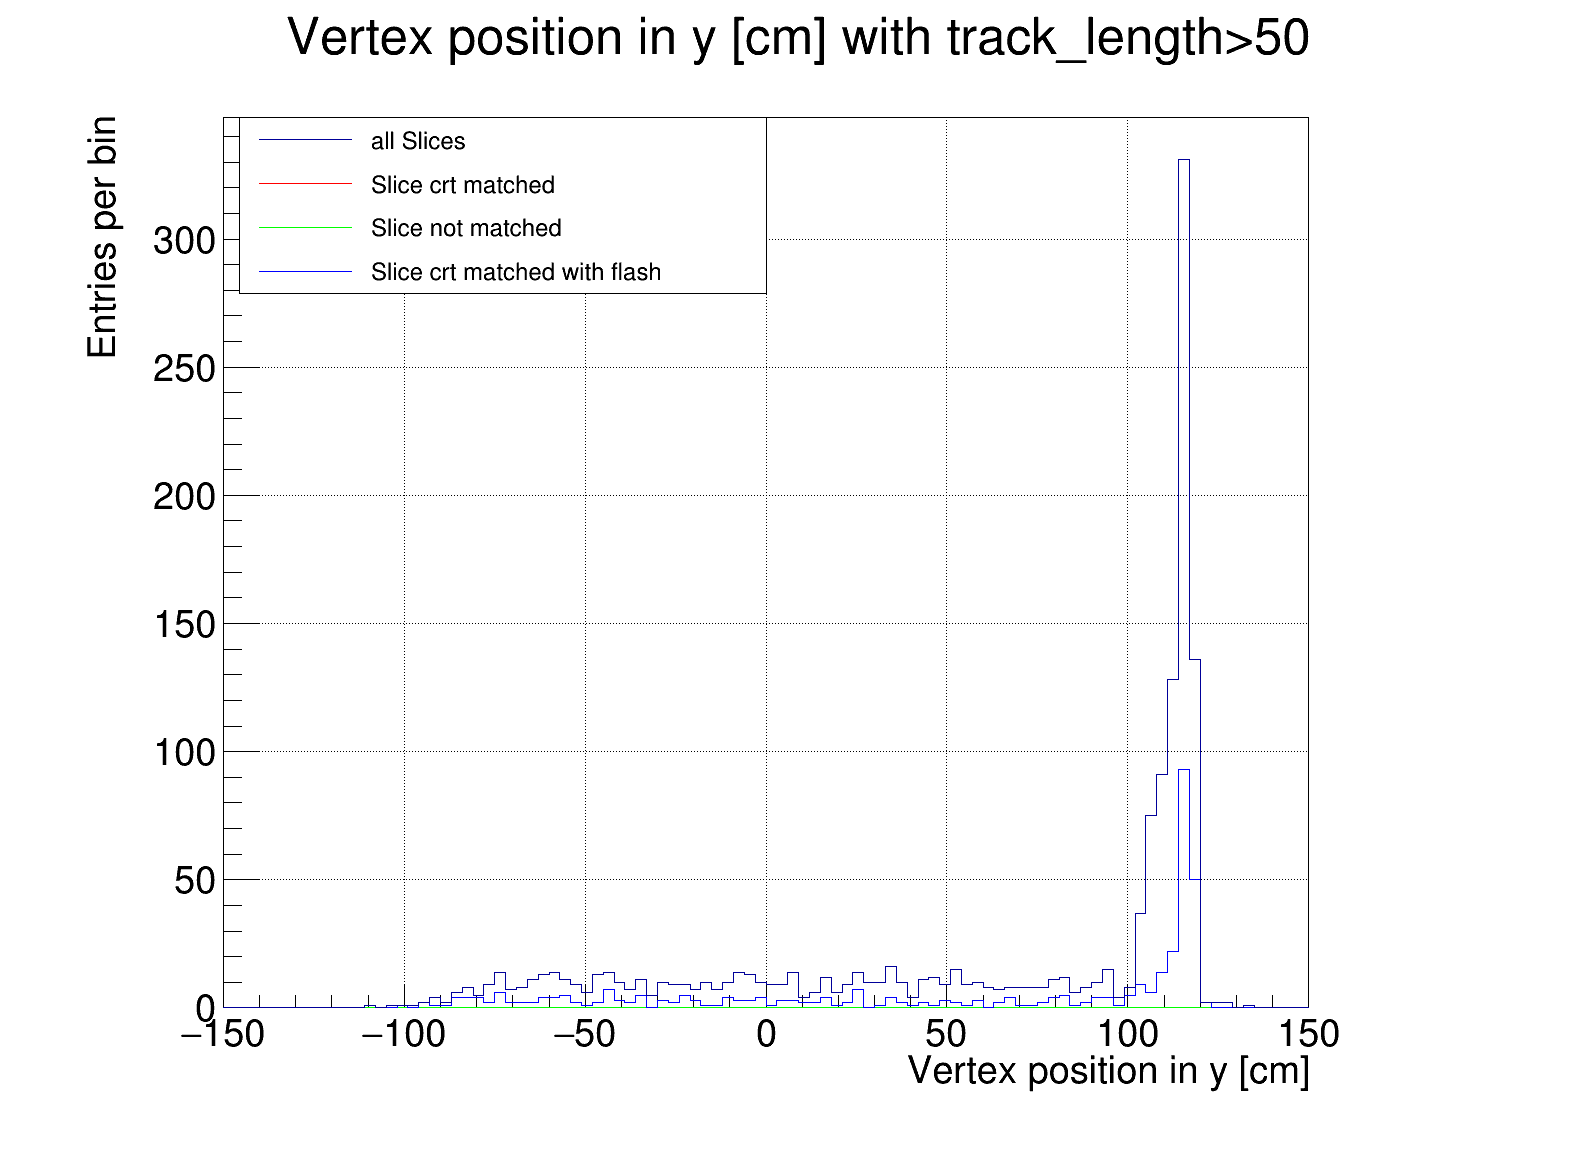

In [12]:
# generate Vertex y position plot
h_y = ROOT.TH1F("h_y","Vertex position in y [cm]" + title_cut,100,-150,150)
h_y1 = ROOT.TH1F("h_y1","CRT ts0",100,-150,150)
h_y2 = ROOT.TH1F("h_y2","CRT ts0",100,-150,150)
h_y3 = ROOT.TH1F("h_y3","CRT ts0",100,-150,150)

test.Draw('vertex_y>>h_y','1' + tracklength)
test.Draw('vertex_y>>h_y1','crtts0!=0' + tracklength)
test.Draw('vertex_y>>h_y2','crtts0==0' + tracklength)
test.Draw('vertex_y>>h_y3','flash_PE!=0' + tracklength)
h_y1.SetLineColorAlpha(2, 1);
h_y2.SetLineColorAlpha(3, 1);
h_y3.SetLineColorAlpha(4, 1);
h_y.SetXTitle("Vertex position in y [cm]");
h_y.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_y,"all Slices","l");
legend.AddEntry(h_y1,"Slice crt matched","l");
legend.AddEntry(h_y2,"Slice not matched","l");
legend.AddEntry(h_y3,"Slice crt matched with flash","l");
#h_y.SetStats(1);
h_y.Draw();
h_y1.Draw("same");
h_y2.Draw("same");
h_y3.Draw("same");
legend.Draw();
h_y.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "vertex_y.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_z,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_z,crtts0==0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/vertex_z.png has been created


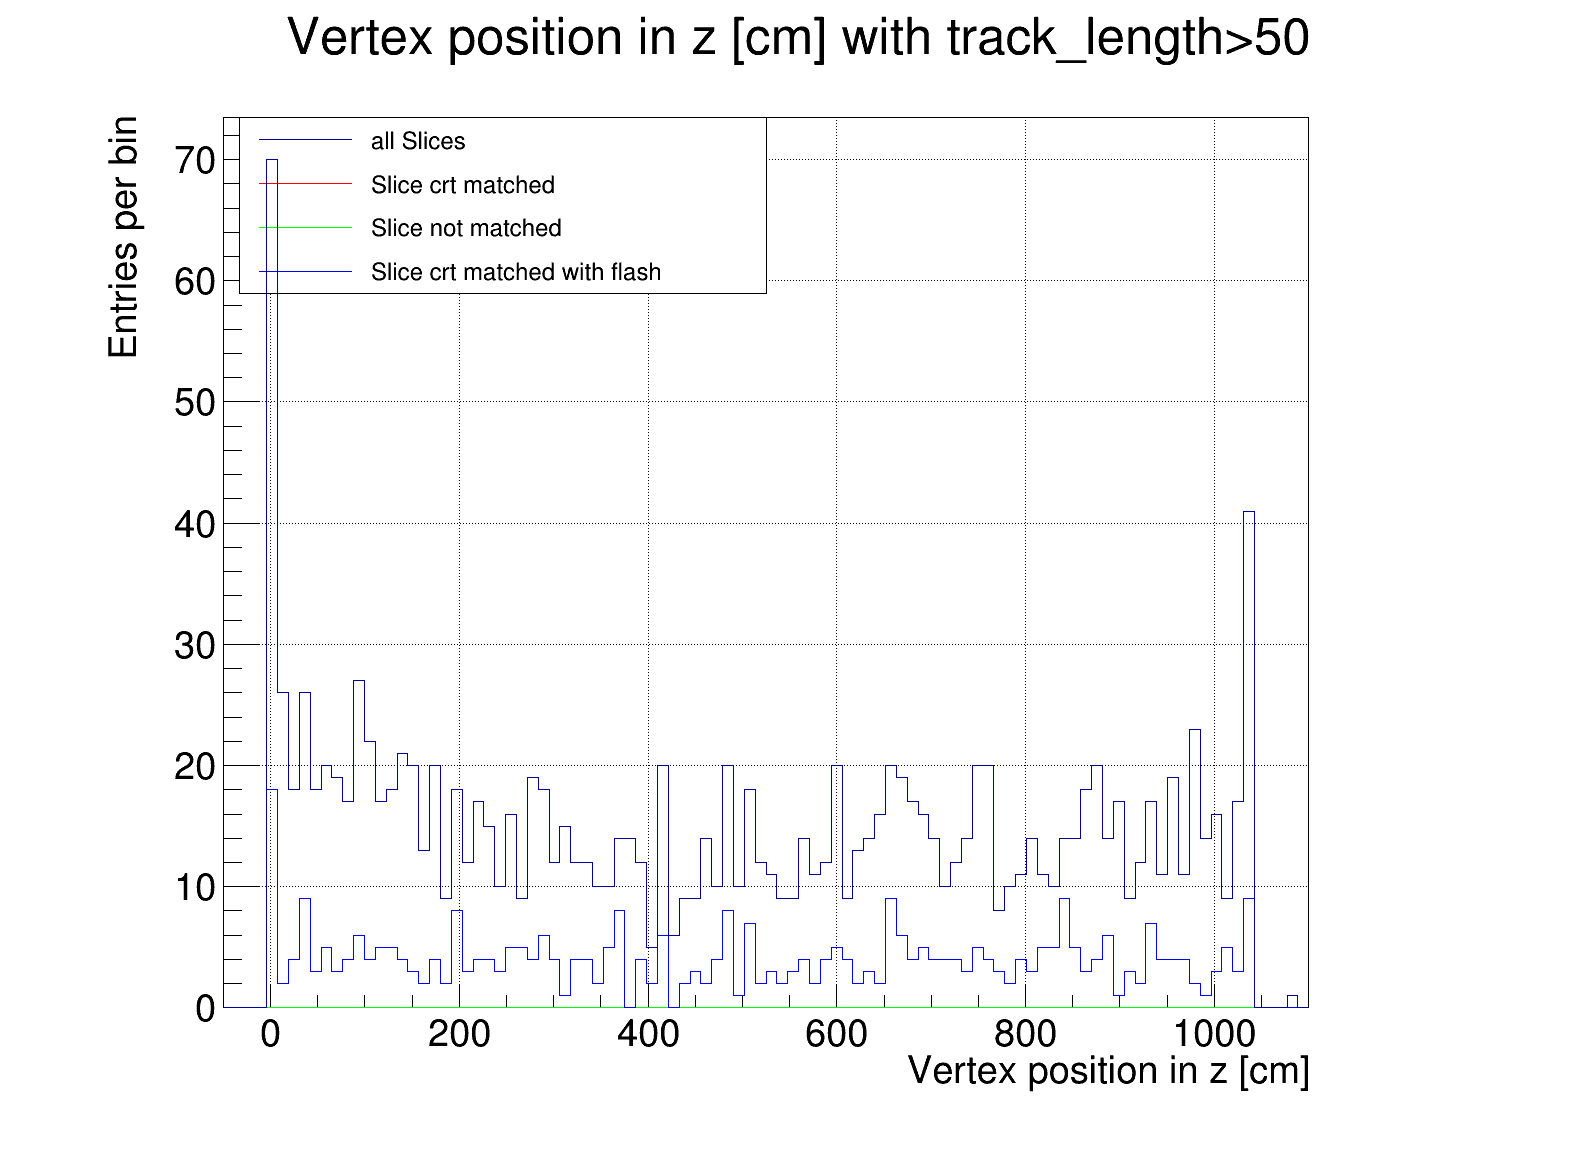

In [13]:
# generate Vertex z position plot
h_z = ROOT.TH1F("h_z","Vertex position in z [cm]" + title_cut,100,-50,1100)
h_z1 = ROOT.TH1F("h_z1","CRT ts0",100,-50,1100)
h_z2 = ROOT.TH1F("h_z2","CRT ts0",100,-50,1100)
h_z3 = ROOT.TH1F("h_z3","CRT ts0",100,-50,1100)

test.Draw('vertex_z>>h_z','1' + tracklength)
test.Draw('vertex_z>>h_z1','crtts0!=0' + tracklength)
test.Draw('vertex_z>>h_z2','crtts0==0' + tracklength)
test.Draw('vertex_z>>h_z3','flash_PE!=0' + tracklength)
h_z1.SetLineColorAlpha(2, 1);
h_z2.SetLineColorAlpha(3, 1);
h_z3.SetLineColorAlpha(4, 1);
h_z.SetXTitle("Vertex position in z [cm]");
h_z.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_z,"all Slices","l");
legend.AddEntry(h_z1,"Slice crt matched","l");
legend.AddEntry(h_z2,"Slice not matched","l");
legend.AddEntry(h_z3,"Slice crt matched with flash","l");
#h_z.SetStats(1);
h_z.Draw();
h_z1.Draw("same");
h_z2.Draw("same");
h_z3.Draw("same");
legend.Draw();
h_z.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "vertex_z.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "theta"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),1 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),crtts0==0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "theta"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),flash_PE!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_theta.png has been created


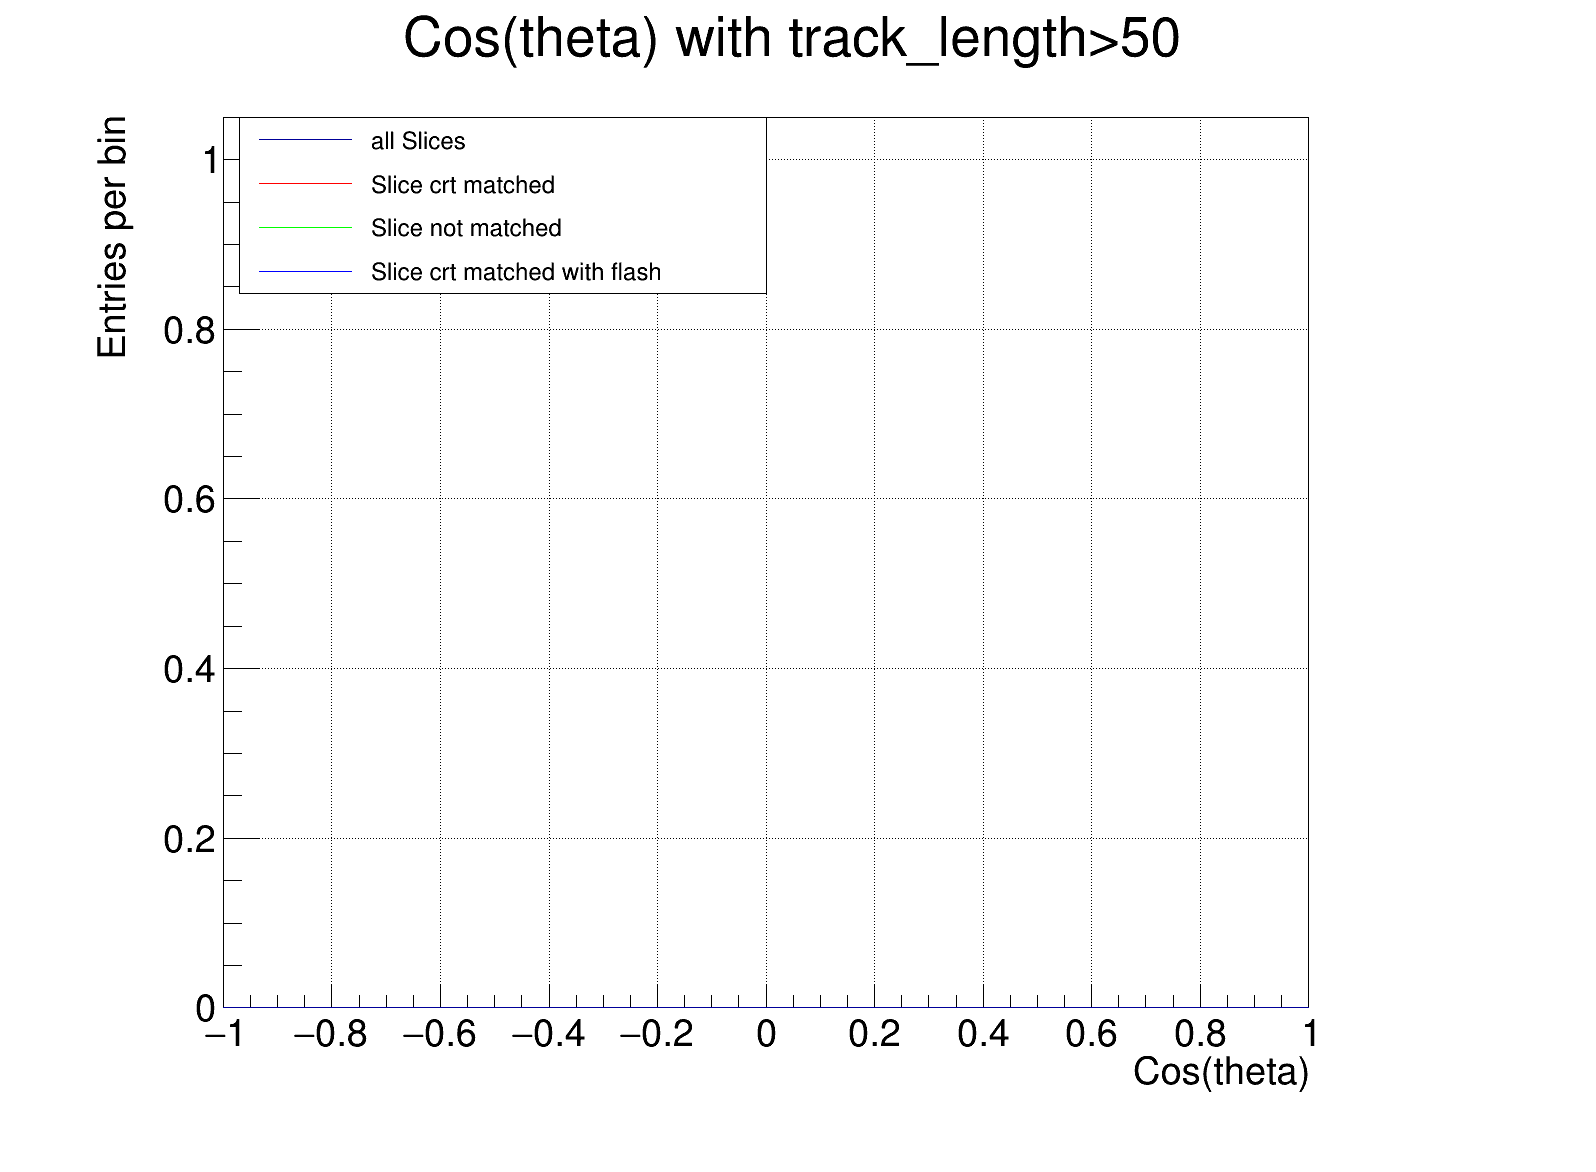

In [14]:
# generate theta plot
h_theta = ROOT.TH1F("h_theta","Cos(theta)" + title_cut,100,-1,1)
h_theta1 = ROOT.TH1F("h_theta1","Cos(theta)",100,-1,1)
h_theta2 = ROOT.TH1F("h_theta2","Cos(theta)",100,-1,1)
h_theta3 = ROOT.TH1F("h_theta3","Cos(theta)",100,-1,1)

test.Draw('cos(theta)>>h_theta','1' + tracklength)
test.Draw('cos(theta)>>h_theta1','crtts0!=0' + tracklength)
test.Draw('cos(theta)>>h_theta2','crtts0==0' + tracklength)
test.Draw('cos(theta)>>h_theta3','flash_PE!=0' + tracklength)
h_theta1.SetLineColorAlpha(2, 1);
h_theta2.SetLineColorAlpha(3, 1);
h_theta3.SetLineColorAlpha(4, 1);
h_theta.SetXTitle("Cos(theta)");
h_theta.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_theta,"all Slices","l");
legend.AddEntry(h_theta1,"Slice crt matched","l");
legend.AddEntry(h_theta2,"Slice not matched","l");
legend.AddEntry(h_theta3,"Slice crt matched with flash","l");
#h_z.SetStats(1);
h_theta.Draw();
h_theta1.Draw("same");
h_theta2.Draw("same");
h_theta3.Draw("same");
legend.Draw();
h_theta.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_theta.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "momentum"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,momentum!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "momentum"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,momentum!=0 && crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "momentum"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,momentum!=0 && crtts0==0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "momentum"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,momentum!=0 && flash_PE!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_momentum.png has been created


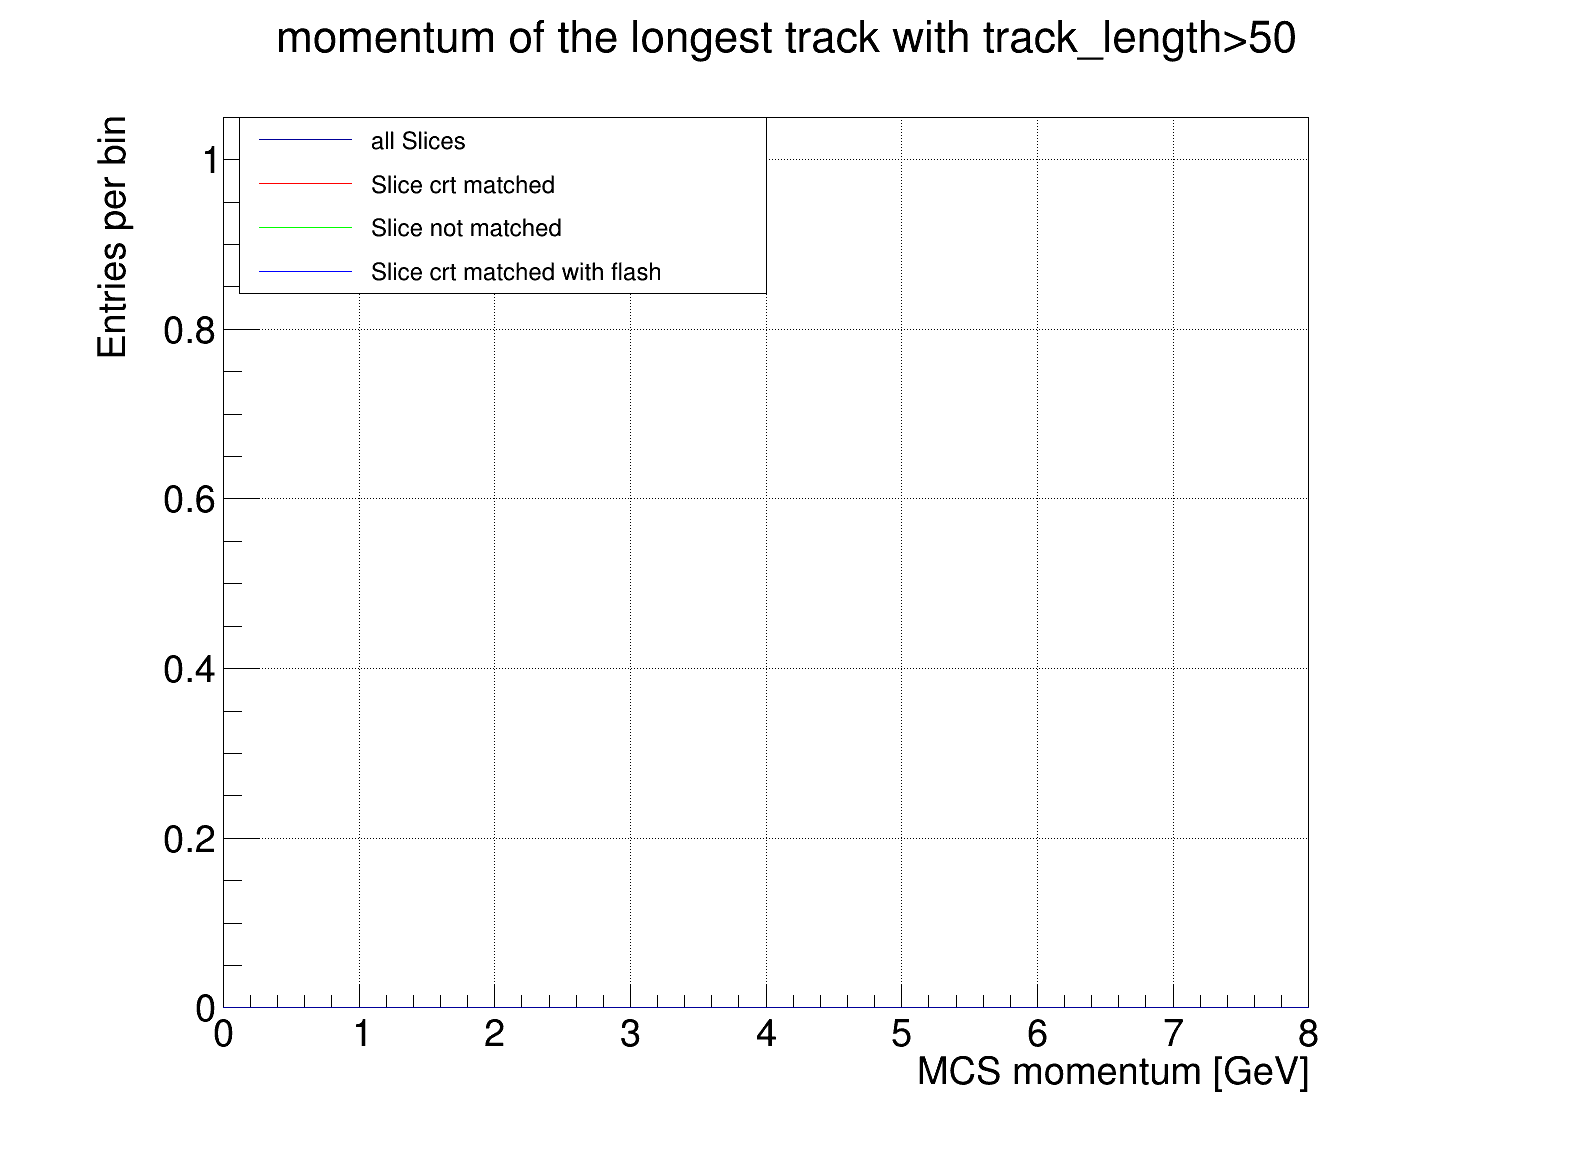

In [15]:
# generate momentum plot
h_momentum = ROOT.TH1F("h_momentum","momentum of the longest track" + title_cut,100,0,8)
h_momentum1 = ROOT.TH1F("h_momentum1","momentum",100,0,8)
h_momentum2 = ROOT.TH1F("h_momentum2","momentum",100,0,8)
h_momentum3 = ROOT.TH1F("h_momentum3","momentum",100,0,8)

test.Draw('momentum>>h_momentum','momentum!=0' + tracklength)
test.Draw('momentum>>h_momentum1','momentum!=0 && crtts0!=0' + tracklength)
test.Draw('momentum>>h_momentum2','momentum!=0 && crtts0==0' + tracklength)
test.Draw('momentum>>h_momentum3','momentum!=0 && flash_PE!=0' + tracklength)
h_momentum1.SetLineColorAlpha(2, 1);
h_momentum2.SetLineColorAlpha(3, 1);
h_momentum3.SetLineColorAlpha(4, 1);
h_momentum.SetXTitle("MCS momentum [GeV]");
h_momentum.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_momentum,"all Slices","l");
legend.AddEntry(h_momentum1,"Slice crt matched","l");
legend.AddEntry(h_momentum2,"Slice not matched","l");
legend.AddEntry(h_momentum3,"Slice crt matched with flash","l");
#h_z.SetStats(1);
h_momentum.Draw();
h_momentum1.Draw("same");
h_momentum2.Draw("same");
h_momentum3.Draw("same");
legend.Draw();
h_momentum.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_momentum.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {track_length,track_length!=0 && crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {track_length,track_length!=0 && crtts0==0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_track_length.png has been created


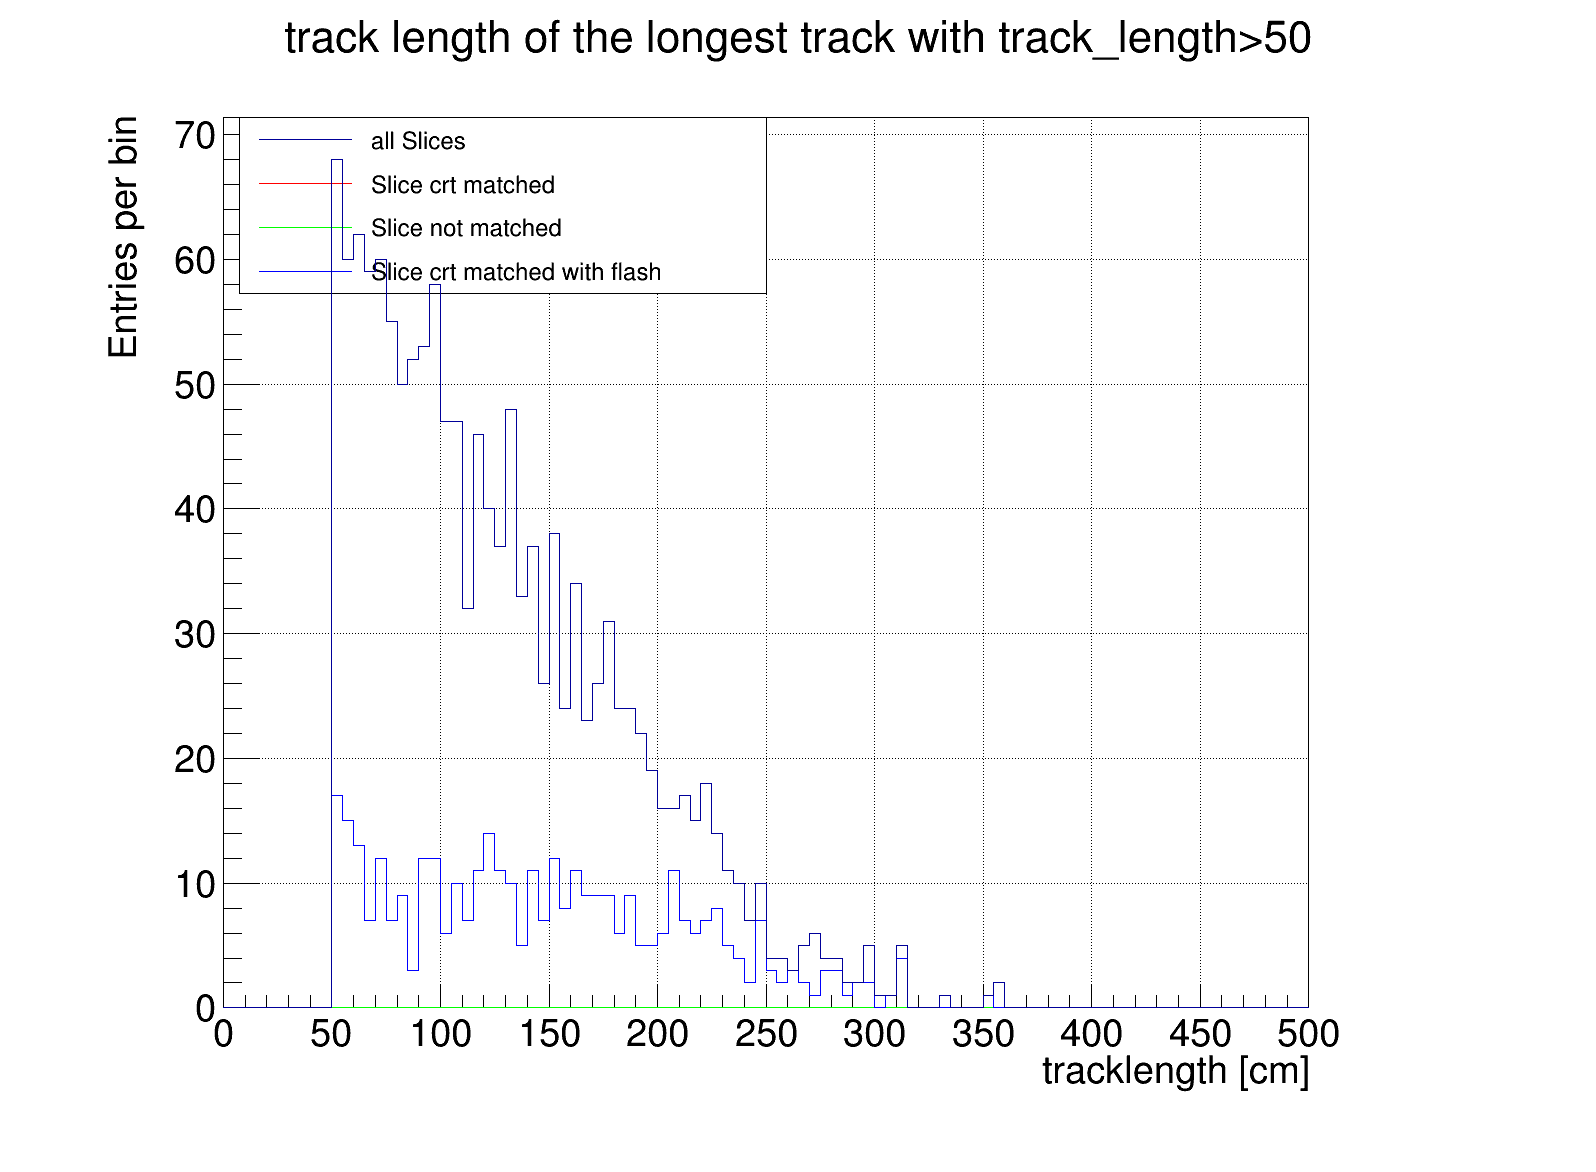

In [16]:
# generate tracklength plot
h_track_length = ROOT.TH1F("h_track_length","track length of the longest track" + title_cut,100,0,500)
h_track_length1 = ROOT.TH1F("h_track_length1","track_length",100,0,500)
h_track_length2 = ROOT.TH1F("h_track_length2","track_length",100,0,500)
h_track_length3 = ROOT.TH1F("h_track_length3","track_length",100,0,500)

test.Draw('track_length>>h_track_length','track_length!=0' + tracklength)
test.Draw('track_length>>h_track_length1','track_length!=0 && crtts0!=0' + tracklength)
test.Draw('track_length>>h_track_length2','track_length!=0 && crtts0==0' + tracklength)
test.Draw('track_length>>h_track_length3','track_length!=0 && flash_PE!=0' + tracklength)
h_track_length1.SetLineColorAlpha(2, 1);
h_track_length2.SetLineColorAlpha(3, 1);
h_track_length3.SetLineColorAlpha(4, 1);
h_track_length.SetXTitle("tracklength [cm]");
h_track_length.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_track_length,"all Slices","l");
legend.AddEntry(h_track_length1,"Slice crt matched","l");
legend.AddEntry(h_track_length2,"Slice not matched","l");
legend.AddEntry(h_track_length3,"Slice crt matched with flash","l");
#h_z.SetStats(1);
h_track_length.Draw();
h_track_length1.Draw("same");
h_track_length2.Draw("same");
h_track_length3.Draw("same");
legend.Draw();
h_track_length.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_track_length.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {track_length,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {track_length,flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_track_lengthEff.png has been created


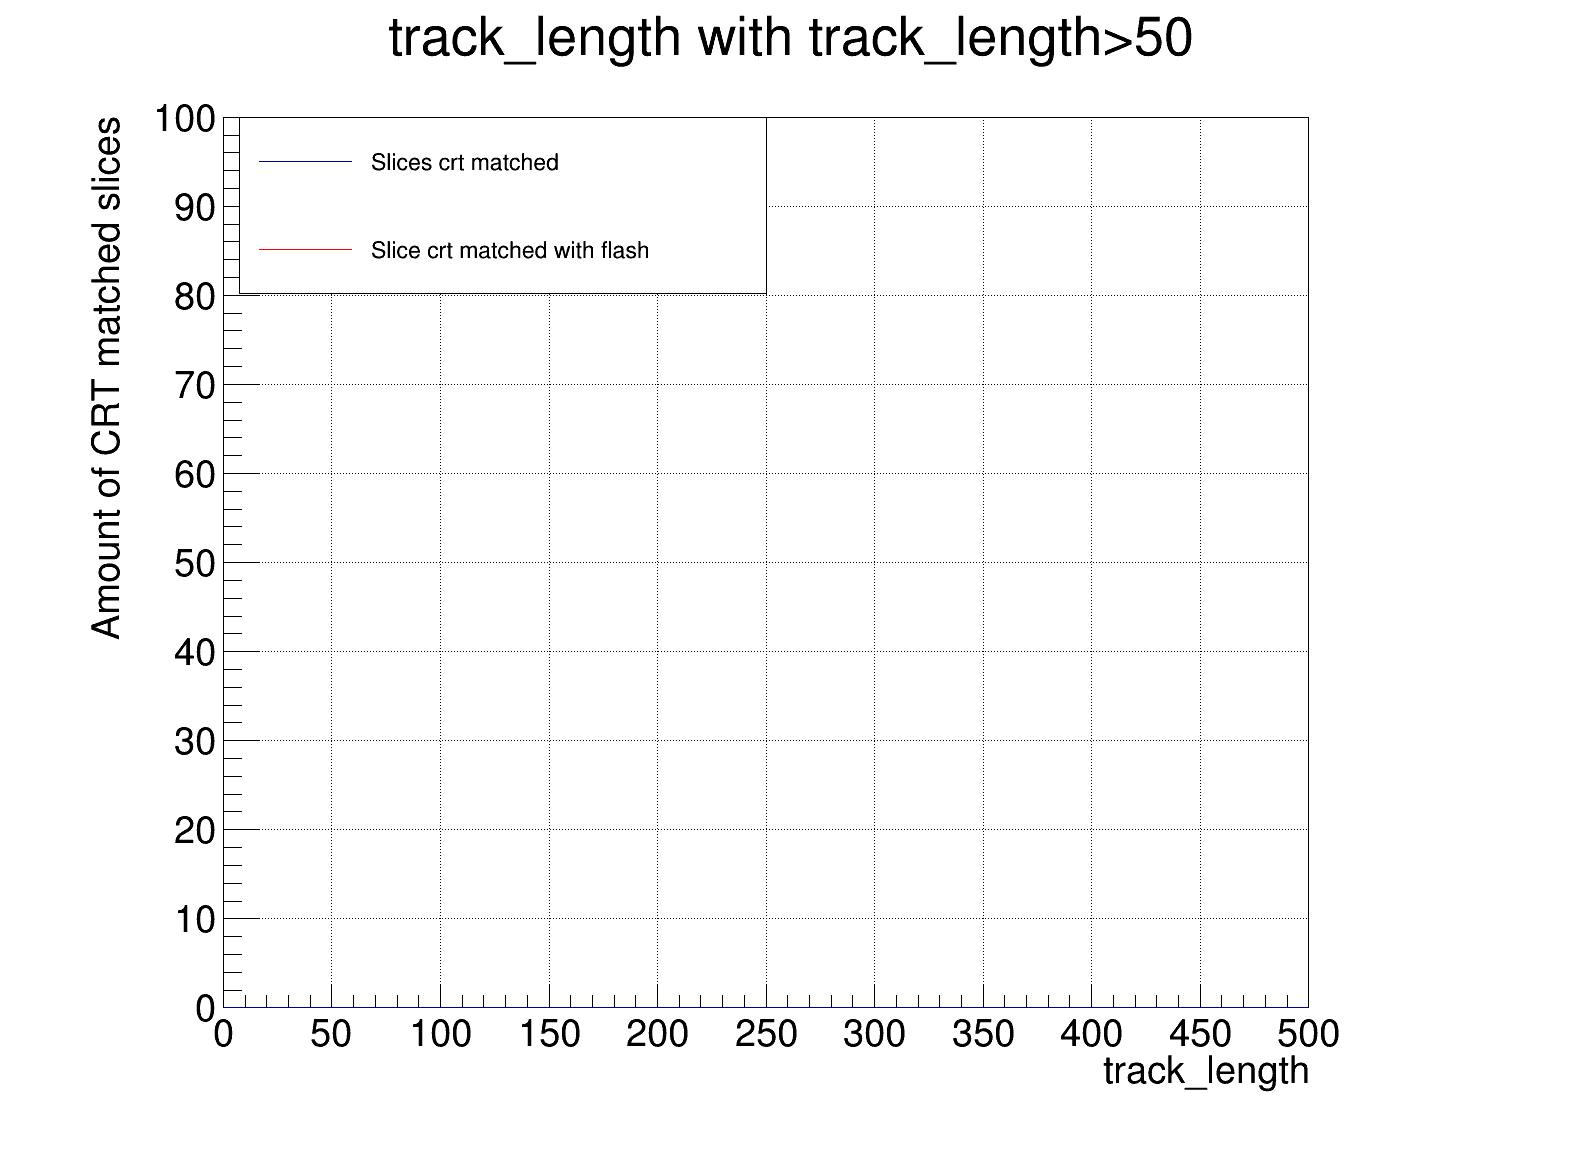

In [17]:
# generate Vertex x position plot
h_track_lengthEff = ROOT.TH1F("h_track_lengthEff","track_length Efficiency",100,0,500)
h_track_lengthEff1 = ROOT.TH1F("h_track_lengthEff1","track_length" + title_cut,100,0,500)
h_track_lengthEff2 = ROOT.TH1F("h_track_lengthEff2","track_length",100,0,500)


test.Draw('track_length>>h_track_lengthEff','1' + tracklength)
test.Draw('track_length>>h_track_lengthEff1','crtts0!=0' + tracklength)
test.Draw('track_length>>h_track_lengthEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_track_lengthEff1.Divide(h_track_lengthEff)
h_track_lengthEff2.Divide(h_track_lengthEff)

h_track_lengthEff1.Scale(100)
h_track_lengthEff2.Scale(100)
h_track_lengthEff1.SetMaximum(100);
h_track_lengthEff1.SetMinimum(0);

h_track_lengthEff2.SetLineColorAlpha(2, 1);
h_track_lengthEff1.SetXTitle("track_length");
h_track_lengthEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_track_lengthEff1,"Slices crt matched","l");
legend.AddEntry(h_track_lengthEff2,"Slice crt matched with flash","l");

h_track_lengthEff1.Draw("HIST");
h_track_lengthEff2.Draw("HIST same");
legend.Draw();
h_track_lengthEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_track_lengthEff.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "theta"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),1 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {cos(theta),flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_thetaEff.png has been created


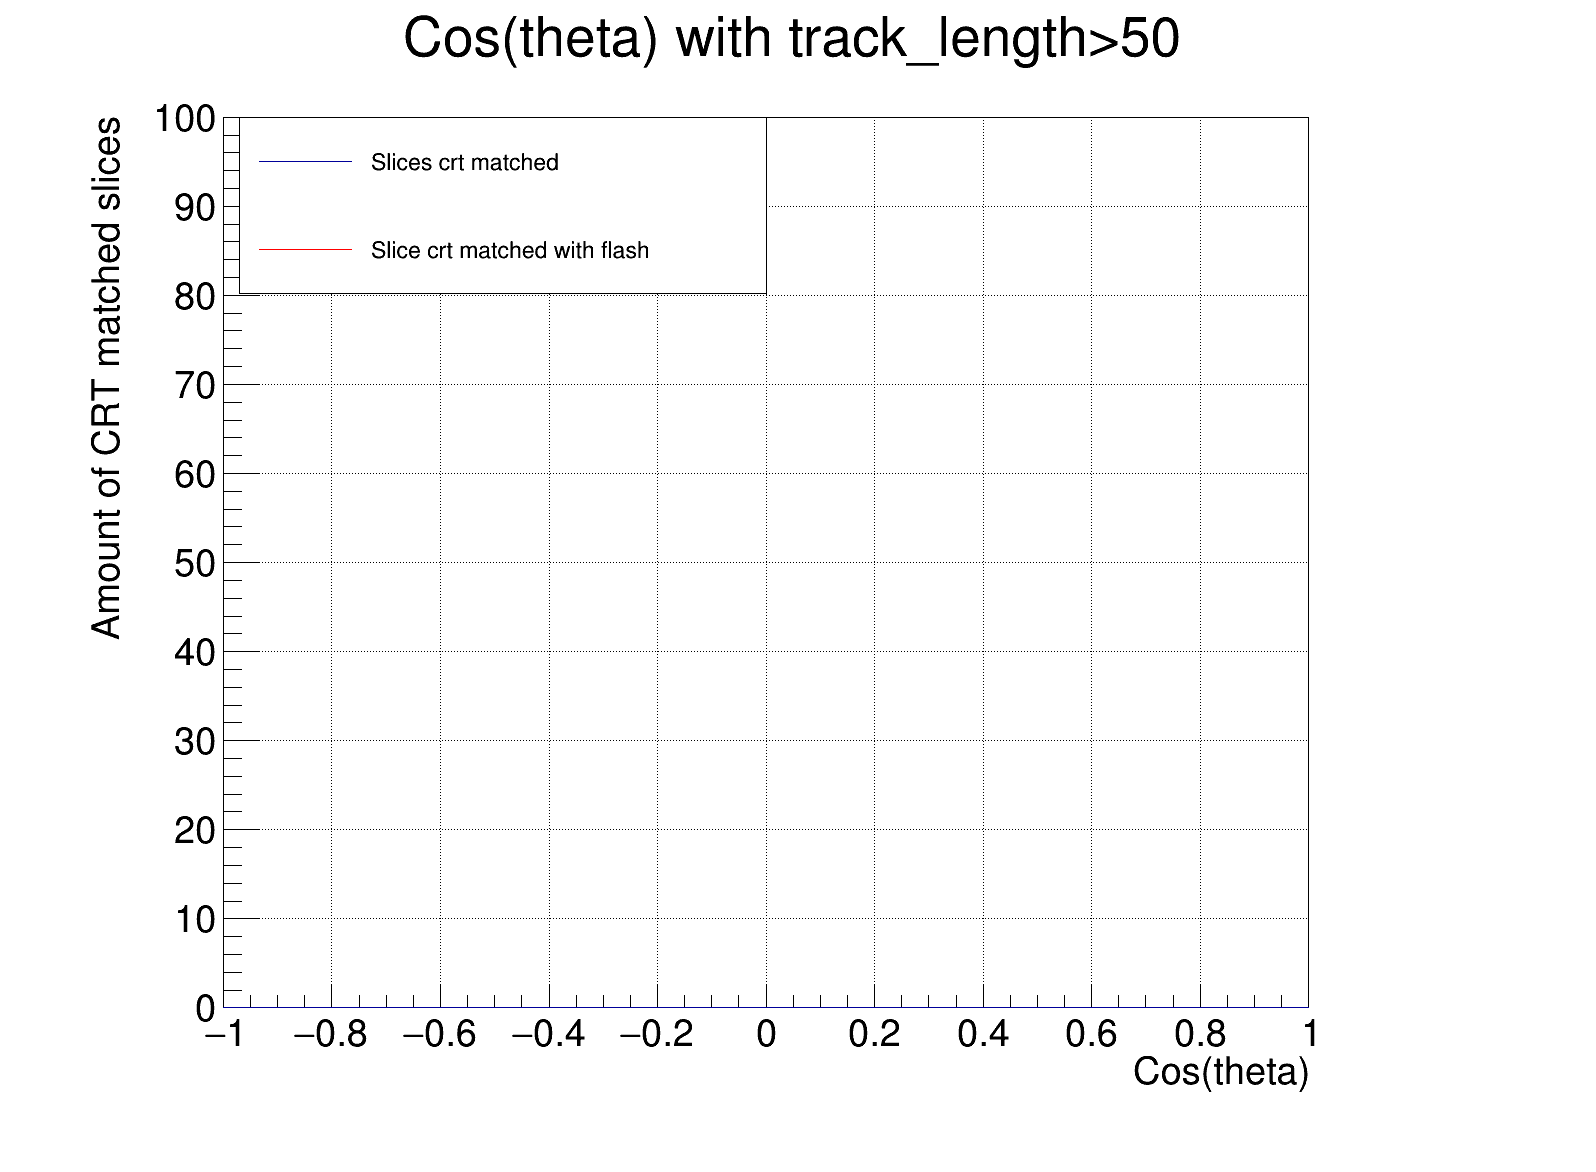

In [18]:
# generate Vertex x position plot
h_thetaEff = ROOT.TH1F("h_thetaEff","Cos(theta) Efficiency" + title_cut,100,-1,1)
h_thetaEff1 = ROOT.TH1F("h_thetaEff1","Cos(theta)" + title_cut,100,-1,1)
h_thetaEff2 = ROOT.TH1F("h_thetaEff2","Cos(theta)",100,-1,1)


test.Draw('cos(theta)>>h_thetaEff','1' + tracklength)
test.Draw('cos(theta)>>h_thetaEff1','crtts0!=0' + tracklength)
test.Draw('cos(theta)>>h_thetaEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_thetaEff1.Divide(h_thetaEff)
h_thetaEff2.Divide(h_thetaEff)

h_thetaEff1.Scale(100)
h_thetaEff2.Scale(100)
h_thetaEff1.SetMaximum(100);
h_thetaEff1.SetMinimum(0);

h_thetaEff2.SetLineColorAlpha(2, 1);
h_thetaEff1.SetXTitle("Cos(theta)");
h_thetaEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_thetaEff1,"Slices crt matched","l");
legend.AddEntry(h_thetaEff2,"Slice crt matched with flash","l");

h_thetaEff1.Draw("HIST");
h_thetaEff2.Draw("HIST same");
legend.Draw();
h_thetaEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_thetaEff.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "momentum"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,1 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {momentum,flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_momentumEff.png has been created


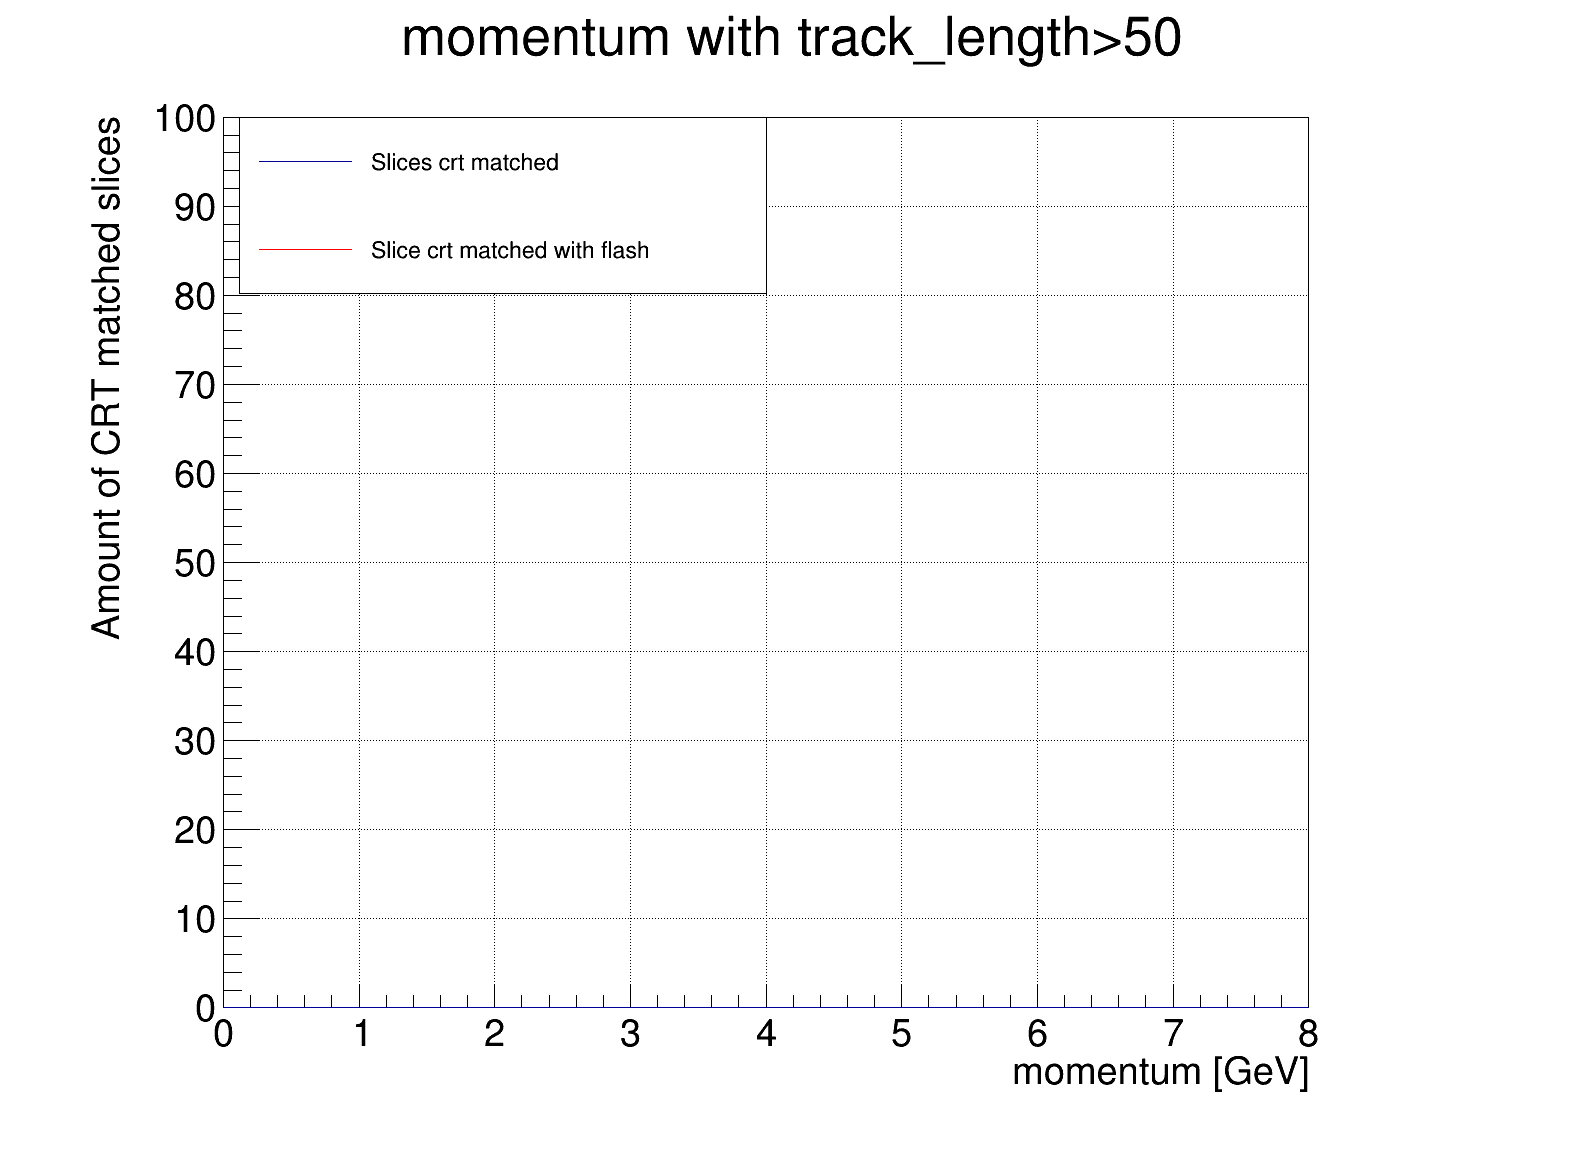

In [19]:
# generate Vertex x position plot
h_momentumEff = ROOT.TH1F("h_momentumEff","momentum Efficiency" + title_cut,100,0,8)
h_momentumEff1 = ROOT.TH1F("h_momentumEff1","momentum" + title_cut,100,0,8)
h_momentumEff2 = ROOT.TH1F("h_momentumEff2","momentum",100,0,8)


test.Draw('momentum>>h_momentumEff','1' + tracklength)
test.Draw('momentum>>h_momentumEff1','crtts0!=0' + tracklength)
test.Draw('momentum>>h_momentumEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_momentumEff1.Divide(h_momentumEff)
h_momentumEff2.Divide(h_momentumEff)

h_momentumEff1.Scale(100)
h_momentumEff2.Scale(100)
h_momentumEff1.SetMaximum(100);
h_momentumEff1.SetMinimum(0);

h_momentumEff2.SetLineColorAlpha(2, 1);
h_momentumEff1.SetXTitle("momentum [GeV]");
h_momentumEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_momentumEff1,"Slices crt matched","l");
legend.AddEntry(h_momentumEff2,"Slice crt matched with flash","l");

h_momentumEff1.Draw("HIST");
h_momentumEff2.Draw("HIST same");
legend.Draw();
h_momentumEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_momentumEff.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x,flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_vertex_xEff.png has been created


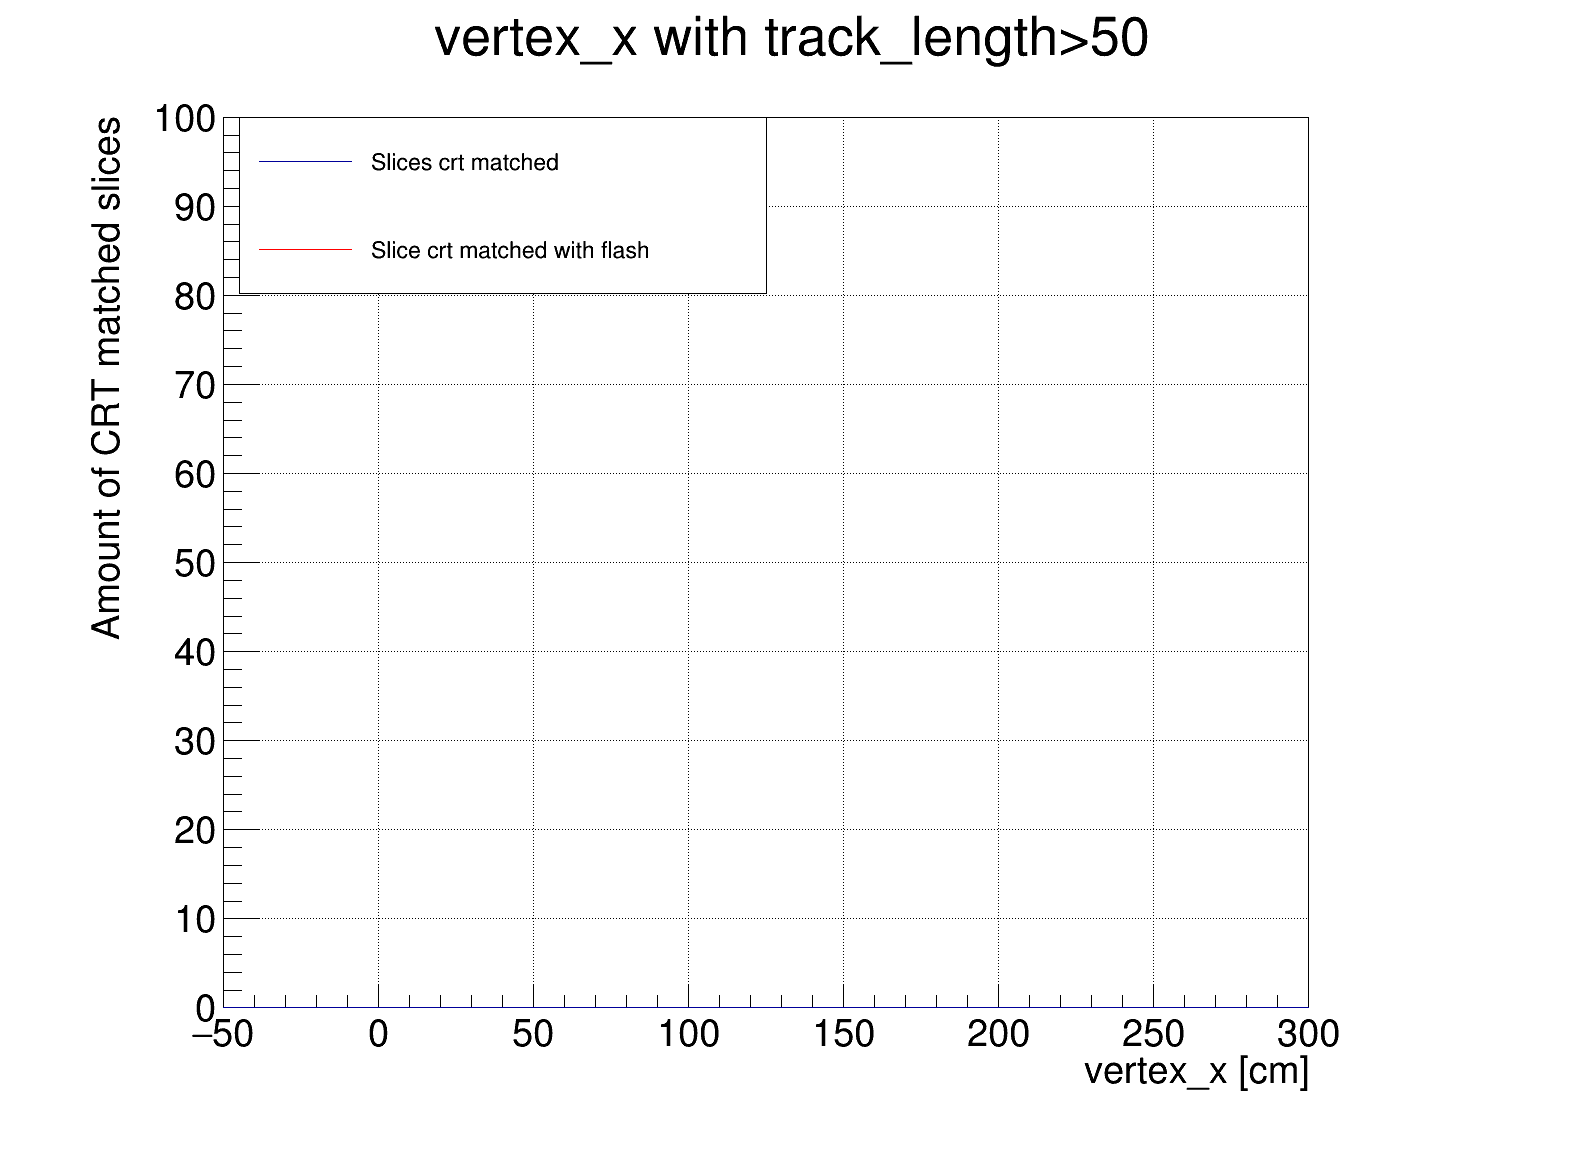

In [20]:
# generate Vertex x position plot
h_vertex_xEff = ROOT.TH1F("h_vertex_xEff","vertex_x Efficiency" + title_cut,100,-50,300)
h_vertex_xEff1 = ROOT.TH1F("h_vertex_xEff1","vertex_x" + title_cut,100,-50,300)
h_vertex_xEff2 = ROOT.TH1F("h_vertex_xEff2","vertex_x",100,-50,300)


test.Draw('vertex_x>>h_vertex_xEff','1' + tracklength)
test.Draw('vertex_x>>h_vertex_xEff1','crtts0!=0' + tracklength)
test.Draw('vertex_x>>h_vertex_xEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_vertex_xEff1.Divide(h_vertex_xEff)
h_vertex_xEff2.Divide(h_vertex_xEff)

h_vertex_xEff1.Scale(100)
h_vertex_xEff2.Scale(100)
h_vertex_xEff1.SetMaximum(100);
h_vertex_xEff1.SetMinimum(0);

h_vertex_xEff2.SetLineColorAlpha(2, 1);
h_vertex_xEff1.SetXTitle("vertex_x [cm]");
h_vertex_xEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_vertex_xEff1,"Slices crt matched","l");
legend.AddEntry(h_vertex_xEff2,"Slice crt matched with flash","l");

h_vertex_xEff1.Draw("HIST");
h_vertex_xEff2.Draw("HIST same");
legend.Draw();
h_vertex_xEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_vertex_xEff.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_y,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_y,flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_vertex_yEff.png has been created


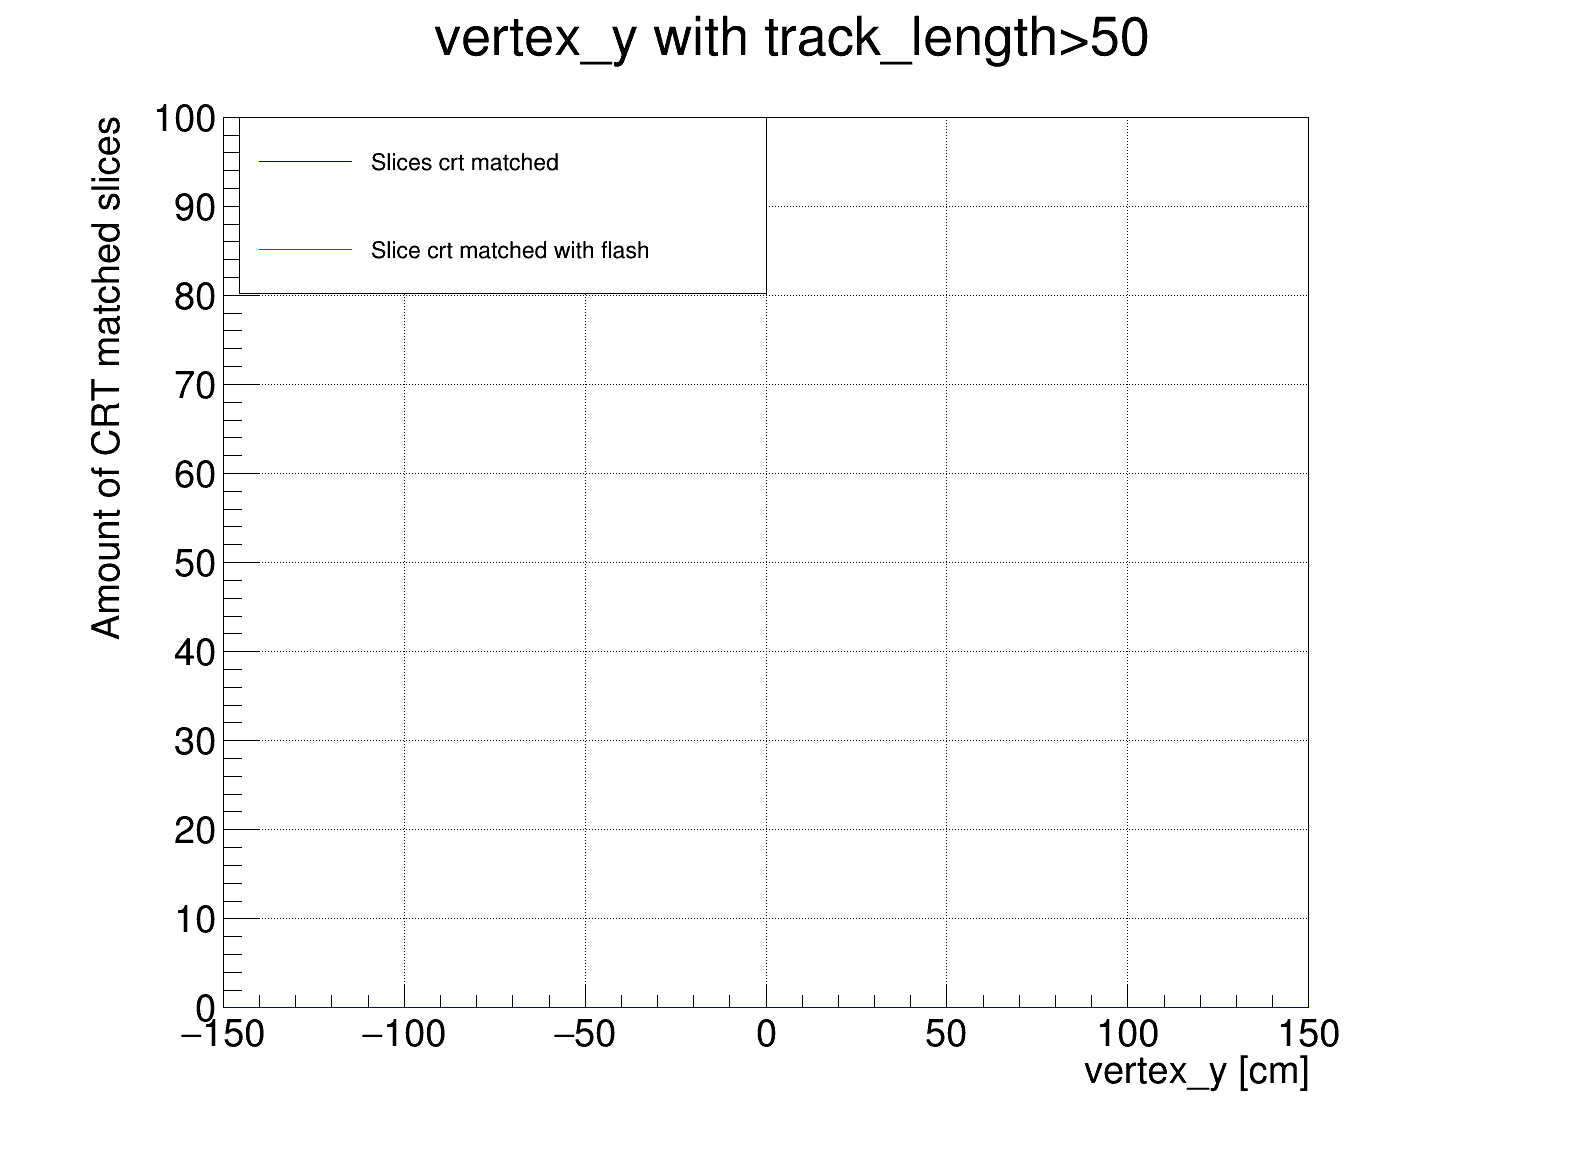

In [21]:
h_vertex_yEff = ROOT.TH1F("h_vertex_yEff","vertex_y Efficiency" + title_cut,100,-150,150)
h_vertex_yEff1 = ROOT.TH1F("h_vertex_yEff1","vertex_y" + title_cut,100,-150,150)
h_vertex_yEff2 = ROOT.TH1F("h_vertex_yEff2","vertex_y",100,-150,150)


test.Draw('vertex_y>>h_vertex_yEff','1' + tracklength)
test.Draw('vertex_y>>h_vertex_yEff1','crtts0!=0' + tracklength)
test.Draw('vertex_y>>h_vertex_yEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_vertex_yEff1.Divide(h_vertex_yEff)
h_vertex_yEff2.Divide(h_vertex_yEff)

h_vertex_yEff1.Scale(100)
h_vertex_yEff2.Scale(100)
h_vertex_yEff1.SetMaximum(100);
h_vertex_yEff1.SetMinimum(0);

h_vertex_yEff2.SetLineColorAlpha(2, 1);
h_vertex_yEff1.SetXTitle("vertex_y [cm]");
h_vertex_yEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_vertex_yEff1,"Slices crt matched","l");
legend.AddEntry(h_vertex_yEff2,"Slice crt matched with flash","l");

h_vertex_yEff1.Draw("HIST");
h_vertex_yEff2.Draw("HIST same");
legend.Draw();
h_vertex_yEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_vertex_yEff.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_z,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_z,flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_vertex_zEff.png has been created


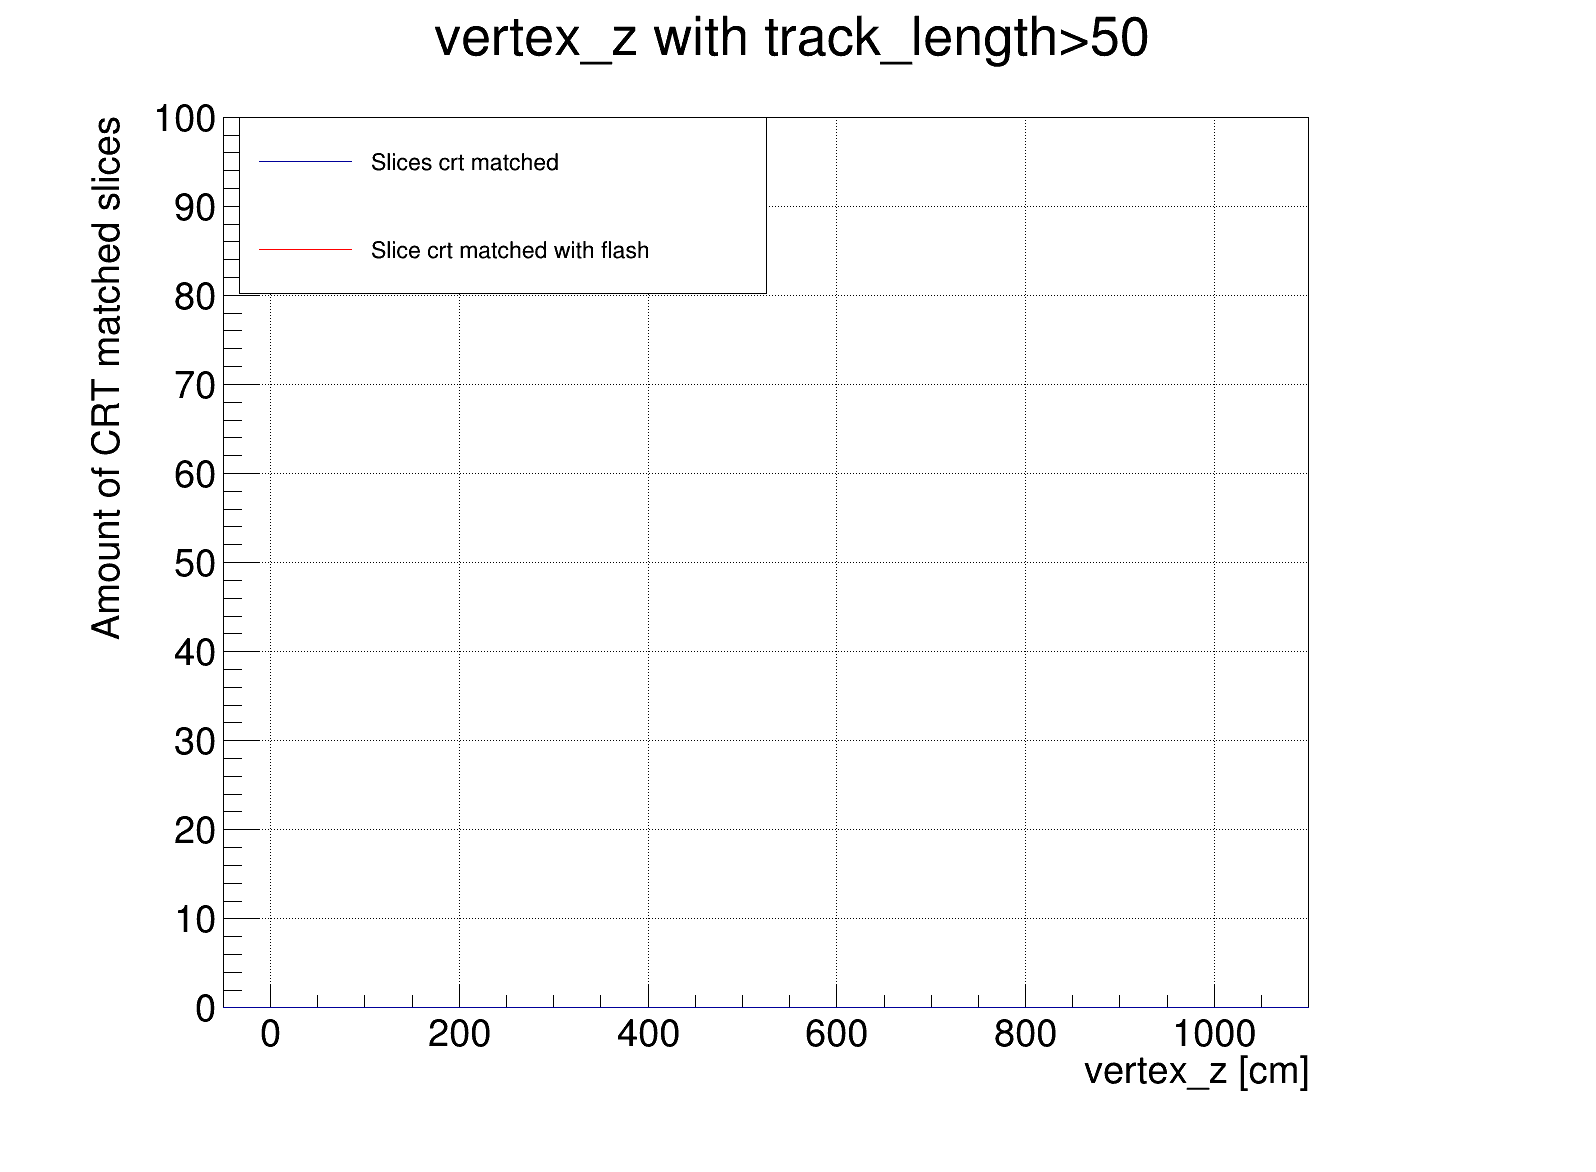

In [22]:
h_vertex_zEff = ROOT.TH1F("h_vertex_zEff","vertex_z Efficiency" + title_cut,100,-50,1100)
h_vertex_zEff1 = ROOT.TH1F("h_vertex_zEff1","vertex_z" + title_cut,100,-50,1100)
h_vertex_zEff2 = ROOT.TH1F("h_vertex_zEff2","vertex_z",100,-50,1100)


test.Draw('vertex_z>>h_vertex_zEff','1' + tracklength)
test.Draw('vertex_z>>h_vertex_zEff1','crtts0!=0' + tracklength)
test.Draw('vertex_z>>h_vertex_zEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_vertex_zEff1.Divide(h_vertex_zEff)
h_vertex_zEff2.Divide(h_vertex_zEff)

h_vertex_zEff1.Scale(100)
h_vertex_zEff2.Scale(100)
h_vertex_zEff1.SetMaximum(100);
h_vertex_zEff1.SetMinimum(0);

h_vertex_zEff2.SetLineColorAlpha(2, 1);
h_vertex_zEff1.SetXTitle("vertex_z [cm]");
h_vertex_zEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_vertex_zEff1,"Slices crt matched","l");
legend.AddEntry(h_vertex_zEff2,"Slice crt matched with flash","l");

h_vertex_zEff1.Draw("HIST");
h_vertex_zEff2.Draw("HIST same");
legend.Draw();
h_vertex_zEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_vertex_zEff.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x-0.111436*(crtts0-trigger+69100)/1000,1 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x-0.111436*(crtts0-trigger+69100)/1000,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x-0.111436*(crtts0-trigger+69100)/1000,flash_PE!=0 && crtts0!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_vertex_x_corrEff.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/h_vertex_x_corrEff_re.png has been created


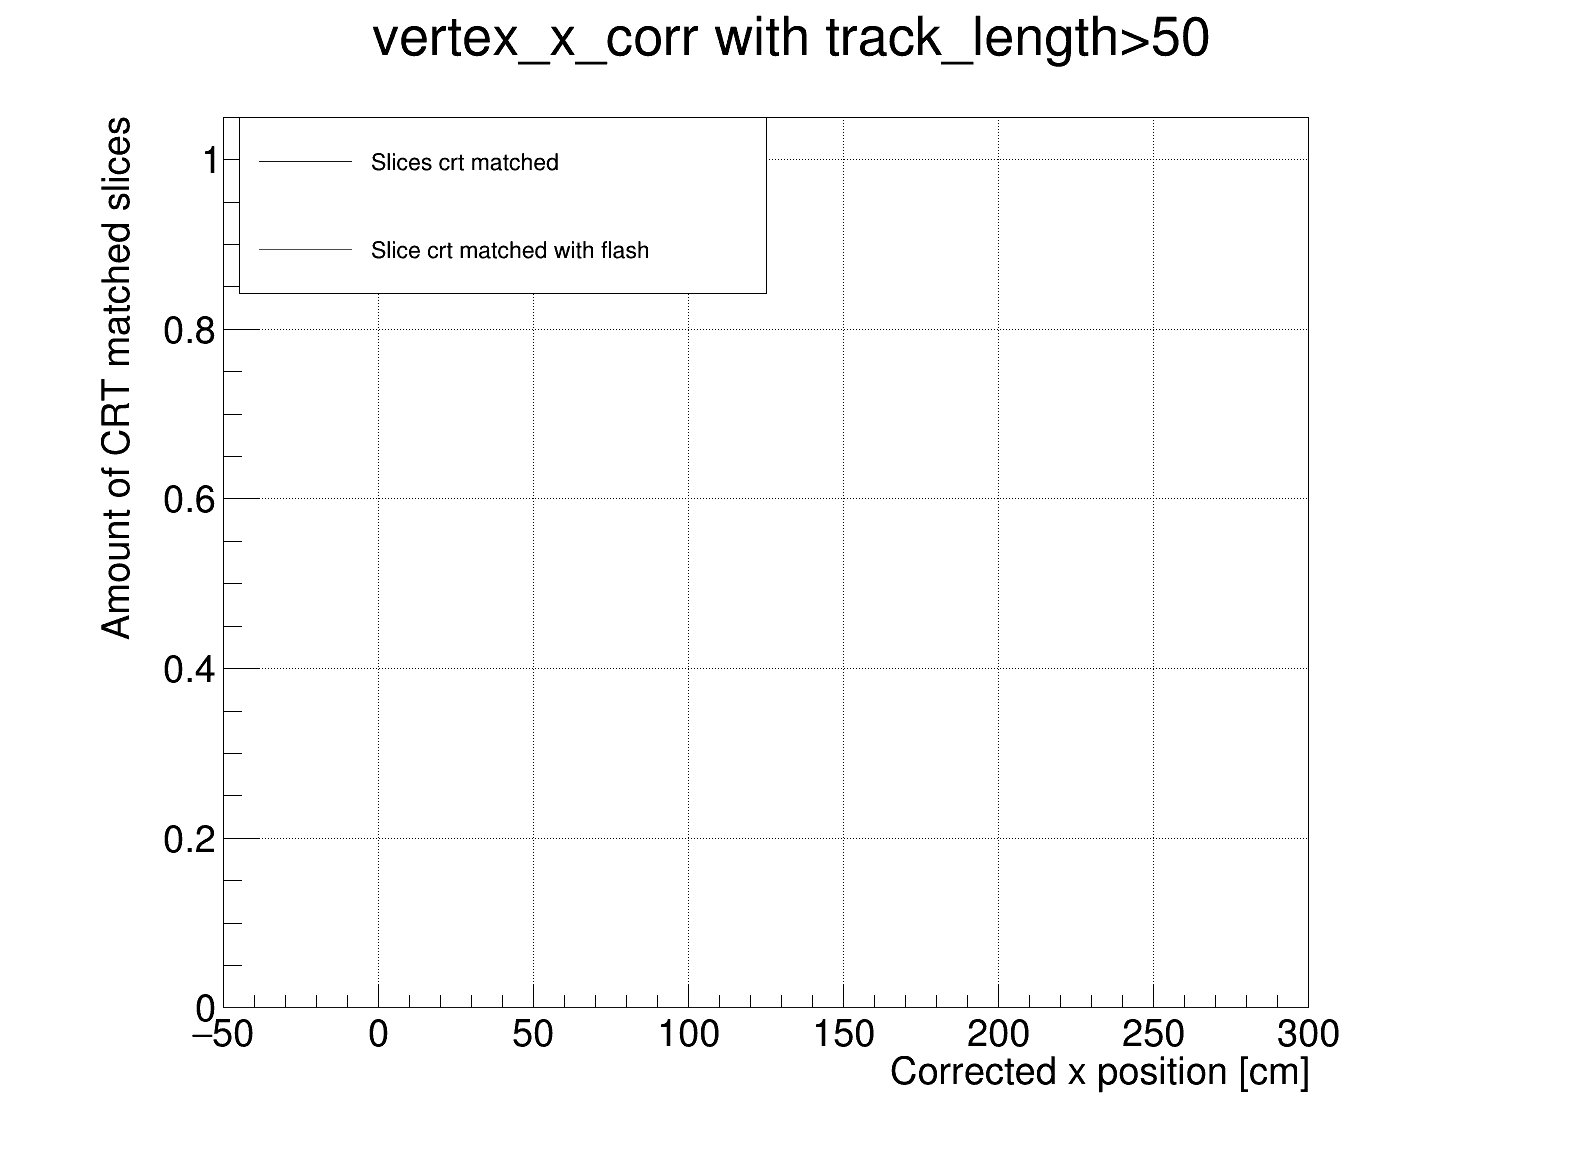

In [23]:
# generate Vertex x position plot
h_vertex_x_corrEff = ROOT.TH1F("h_vertex_x_corrEff","vertex_x_corr Efficiency" + title_cut,100,-50,300)
h_vertex_x_corrEff1 = ROOT.TH1F("h_vertex_x_corrEff1","vertex_x_corr" + title_cut,100,-50,300)
h_vertex_x_corrEff2 = ROOT.TH1F("h_vertex_x_corrEff2","vertex_x_corr",100,-50,300)


test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_vertex_x_corrEff','1' + tracklength)
test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_vertex_x_corrEff1','crtts0!=0' + tracklength)
test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_vertex_x_corrEff2','flash_PE!=0 && crtts0!=0' + tracklength)

h_vertex_x_corrEff1.Divide(h_vertex_x_corrEff)
h_vertex_x_corrEff2.Divide(h_vertex_x_corrEff)

h_vertex_x_corrEff1.Scale(100)
h_vertex_x_corrEff2.Scale(100)
h_vertex_x_corrEff1.SetMaximum(100);
h_vertex_x_corrEff1.SetMinimum(0);

h_vertex_x_corrEff2.SetLineColorAlpha(2, 1);
h_vertex_x_corrEff1.SetXTitle("Corrected x position [cm]");
h_vertex_x_corrEff1.SetYTitle("Amount of CRT matched slices");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_vertex_x_corrEff1,"Slices crt matched","l");
legend.AddEntry(h_vertex_x_corrEff2,"Slice crt matched with flash","l");

h_vertex_x_corrEff1.Draw("HIST");
h_vertex_x_corrEff2.Draw("HIST same");
legend.Draw();
h_vertex_x_corrEff1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_vertex_x_corrEff.png");

rebinfactor = 2
#h_vertex_x_corrEff_re = h_vertex_x_corrEff.Rebin(2);
h_vertex_x_corrEff_re1 = h_vertex_x_corrEff1.Rebin(rebinfactor)
h_vertex_x_corrEff_re1.Scale(1.0/rebinfactor)
h_vertex_x_corrEff_re2 = h_vertex_x_corrEff2.Rebin(rebinfactor)
h_vertex_x_corrEff_re2.Scale(1.0/rebinfactor)
h_vertex_x_corrEff_re1.Draw()
h_vertex_x_corrEff_re1.Draw("HIST");
h_vertex_x_corrEff_re2.Draw("HIST same");
legend.Draw();
h_vertex_x_corrEff_re1.Draw("HIST same");

c1.Draw()
c1.SaveAs(outputdir + "h_vertex_x_corrEff_re.png");

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x-0.111436*(crtts0-trigger+69100)/1000,crtts0!=0 && track_length>50}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crtts0"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {vertex_x-0.111436*(crtts0-trigger+69100)/1000,crtts0!=0 && flash_PE!=0 && track_length>50}
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/vertex_x_corr.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/bla/vertex_x_corr_log.png has been created


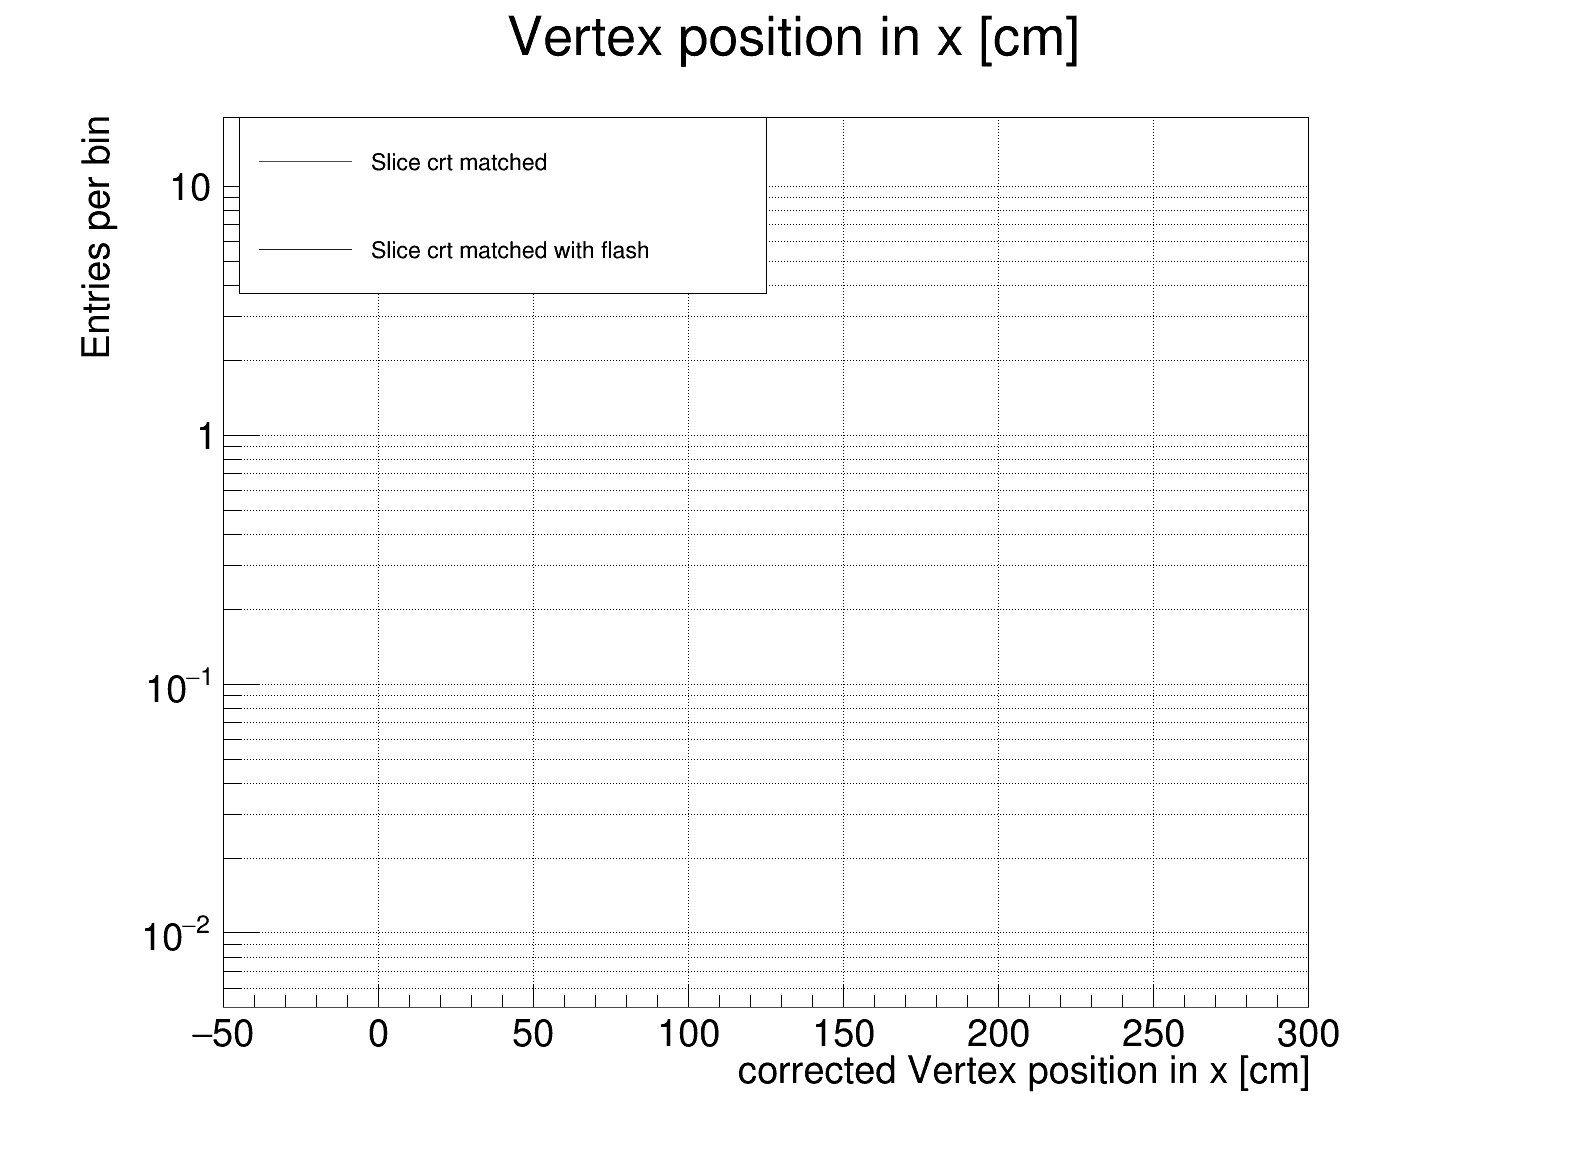

In [24]:
# generate Vertex x position plot
#h_x_corr = ROOT.TH1F("h_x_corr","Vertex position in x [cm]" + title_cut,100,-50,300)
h_x_corr1 = ROOT.TH1F("h_x_corr1","Vertex position in x [cm]",100,-50,300)
#h_x_corr2 = ROOT.TH1F("h_x_corr2","CRT ts0",100,-50,300)
h_x_corr3 = ROOT.TH1F("h_x_corr3","CRT ts0",100,-50,300)

#test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_x_corr','1' + tracklength)
test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_x_corr1','crtts0!=0' + tracklength)
#test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_x_corr2','crtts0==0' + tracklength)
test.Draw('vertex_x-0.111436*(crtts0-trigger+69100)/1000>>h_x_corr3','crtts0!=0 && flash_PE!=0' + tracklength)
h_x_corr1.SetLineColorAlpha(2, 1);
#h_x_corr2.SetLineColorAlpha(3, 1);
h_x_corr3.SetLineColorAlpha(4, 1);
h_x_corr1.SetXTitle("corrected Vertex position in x [cm]");
h_x_corr1.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
#legend.AddEntry(h_x_corr,"all Slices","l");
legend.AddEntry(h_x_corr1,"Slice crt matched","l");
#legend.AddEntry(h_x_corr2,"Slice not matched","l");
legend.AddEntry(h_x_corr3,"Slice crt matched with flash","l");
#h_x_corr.SetStats(1);
h_x_corr1.Draw();
#h_x_corr1.Draw("same");
#h_x_corr2.Draw("same");
h_x_corr3.Draw("same");
legend.Draw();
h_x_corr1.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "vertex_x_corr.png");
c1.SetLogy()
c1.Draw()
c1.SaveAs(outputdir + "vertex_x_corr_log.png");